# HW6 Spike sorting
* Read this page: https://en.wikipedia.org/wiki/Spike_sorting#:~:targetText=Spike%20sorting%20is%20a%20class,neurons%20from%20background%20electrical%20noise. 
* Use dimensionality reduction techniques and clustering algorithms to identify groups of similar spikes
* For instance: 
    * TRY DIFFERENT THRESHOLDS TO EXTRACT SPIKES (change tf parameter)
    * DO PCA
    * DO KMEANs
    * Visualize average waveform associated to each spike: 
        * plt.plot(mean(waveform[labels==0], axis=0))
        
* How many waveforms (neurons/units) are there?
* Plot the clustering result against the first 2 principal components
* Plot the average waveform of each neuron overlaid

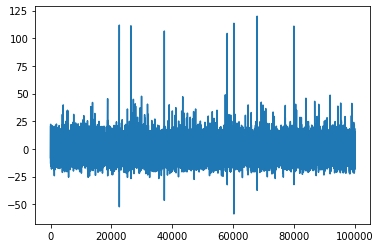

In [25]:
import numpy as np
import pylab as plt
import matplotlib as mpl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
trace = np.load('spike_sort/simulation_1.npy')
plt.plot(trace[:100000])
plt.show()

In [26]:
def get_spikes(data, spike_window=80, tf=5, offset=10, max_thresh=350):
    # extract spike waveforms
    # Calculate threshold based on data mean
    thresh = np.mean(np.abs(data)) *tf

    # Find positions wherere the threshold is crossed
    pos = np.where(data > thresh)[0]
    pos = pos[pos > spike_window]

    # Extract potential spikes and align them to the maximum
    spike_samp = []
    wave_form = np.empty([1, spike_window*2])
    for i in pos:
        if i < data.shape[0] - (spike_window+1):
            # Data from position where threshold is crossed to end of window
            tmp_waveform = data[i:i+spike_window*2]

            # Check if data in window is below upper threshold (artifact rejection)
            if np.max(tmp_waveform) < max_thresh:
                # Find sample with maximum data point in window
                tmp_samp = np.argmax(tmp_waveform) +i

                # Re-center window on maximum sample and shift it by offset
                tmp_waveform = data[tmp_samp-(spike_window-offset):tmp_samp+(spike_window+offset)]

                # Append data
                spike_samp = np.append(spike_samp, tmp_samp)
                wave_form = np.append(wave_form, tmp_waveform.reshape(1, spike_window*2), axis=0)

    # Remove duplicates
    ind = np.where(np.diff(spike_samp) > 1)[0]
    spike_samp = spike_samp[ind]
    wave_form = wave_form[ind]

    return spike_samp, wave_form

tf =5


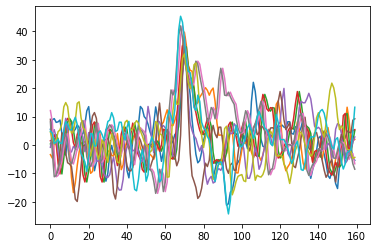

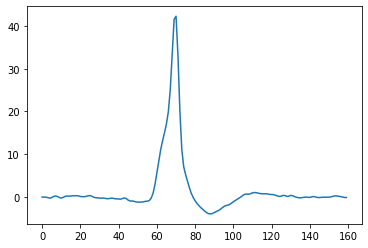

tf =6


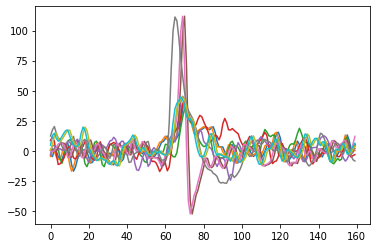

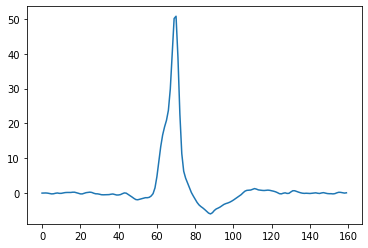

tf =7


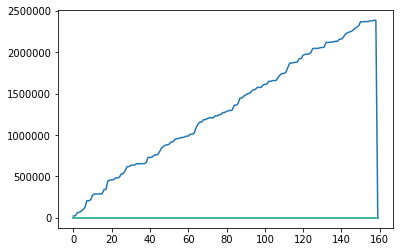

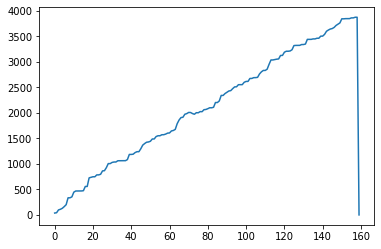

tf =8


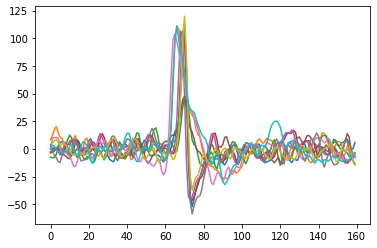

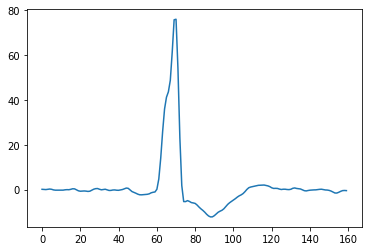

tf =9


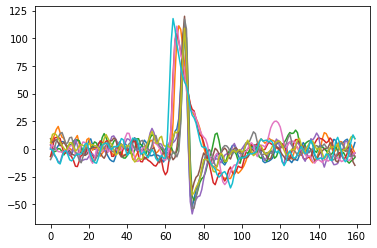

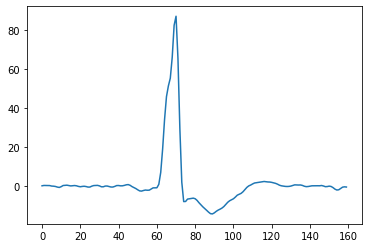

tf =10


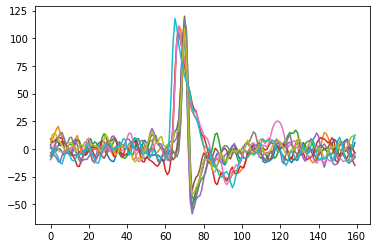

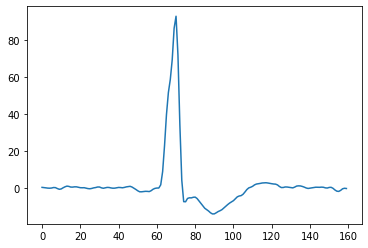

tf =11


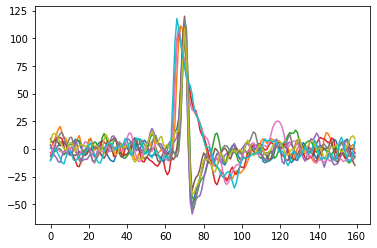

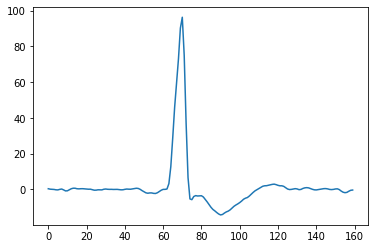

tf =12


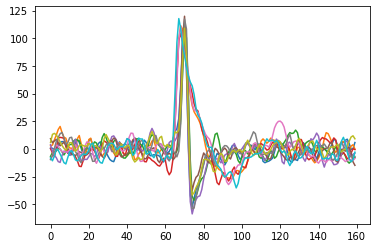

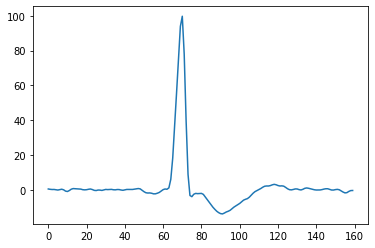

tf =13


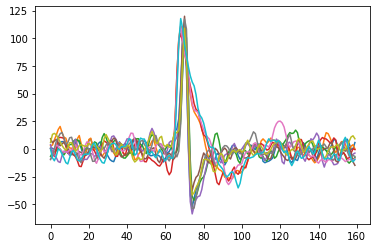

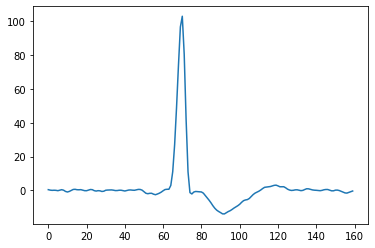

tf =14


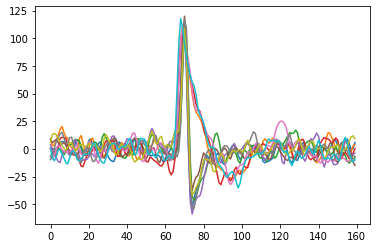

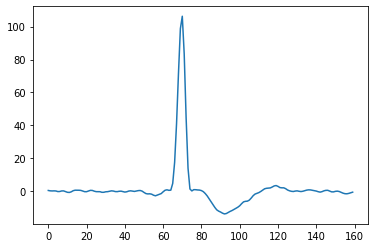

tf =15


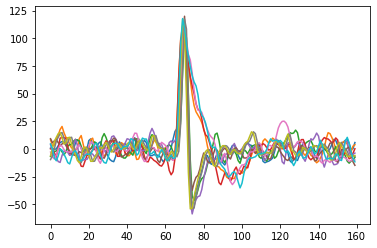

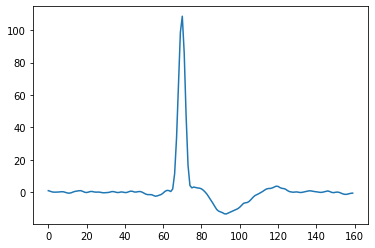

tf =16


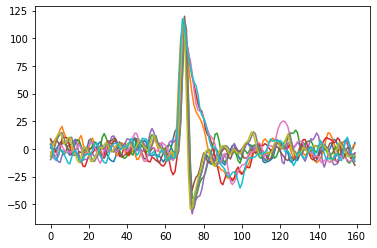

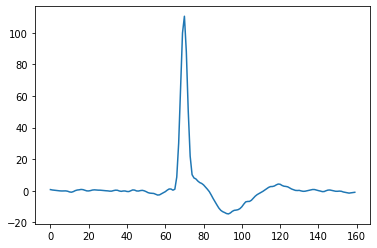

tf =17


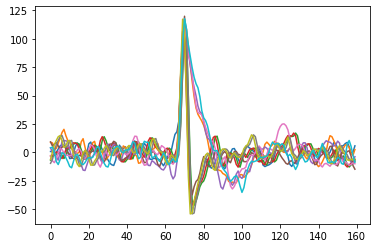

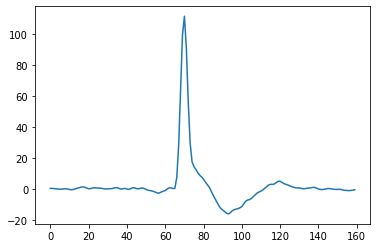

tf =18


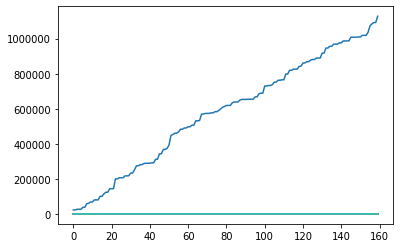

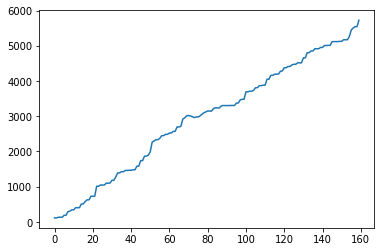

tf =19


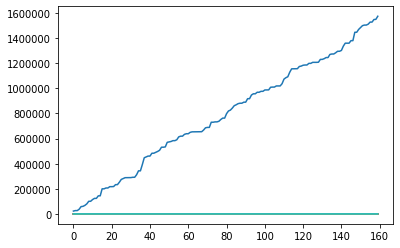

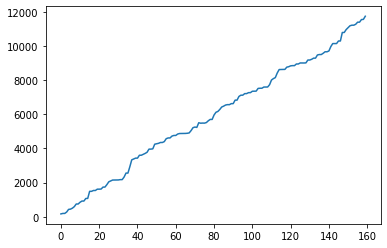

In [108]:
for i in range(5,20):
    spike_samp, wave_form = get_spikes(trace, tf=i)
    print('tf ={}'.format(i))
    plt.show(plt.plot(wave_form[:10].T))
    plt.show(plt.plot(wave_form[:].mean(axis=0)))
    

In [118]:
spike_samp, wave_form = get_spikes(trace, tf=6)

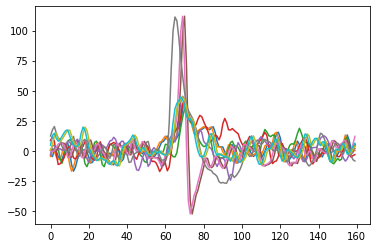

In [119]:
plt.plot(wave_form[:10].T)

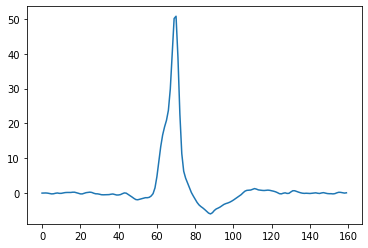

In [120]:
plt.plot(wave_form[:].mean(axis=0))

In [138]:

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaledWaves=wave_form

pca = PCA()
wave_pcs = pca.fit_transform(scaledWaves)

In [139]:
pca.components_

array([[ 0.00129216, -0.00075208, -0.00184896, ..., -0.00598793,
        -0.00572401, -0.00496743],
       [ 0.0047827 ,  0.00341602,  0.00219911, ..., -0.0059475 ,
        -0.00279183, -0.00014809],
       [ 0.00129587,  0.00406816,  0.00479257, ...,  0.00662057,
         0.00928455,  0.00976808],
       ...,
       [ 0.0034771 , -0.0126821 ,  0.02483793, ...,  0.03615961,
        -0.01236579,  0.00155615],
       [-0.00490217,  0.00775883, -0.00769859, ..., -0.05078637,
         0.02313545, -0.00540225],
       [ 0.00767342, -0.02375525,  0.04575385, ...,  0.00835037,
        -0.00852665,  0.00552748]])

In [140]:
pca.explained_variance_ratio_

array([3.17753646e-01, 1.92421159e-01, 5.95398873e-02, 3.59771676e-02,
       2.05656920e-02, 1.99117338e-02, 1.69532752e-02, 1.64402093e-02,
       1.53480278e-02, 1.49145974e-02, 1.37694581e-02, 1.31898899e-02,
       1.27097709e-02, 1.22684158e-02, 1.20027738e-02, 1.14213466e-02,
       1.04378489e-02, 9.80580163e-03, 9.40922722e-03, 9.05424988e-03,
       8.50686933e-03, 7.76361470e-03, 7.67592229e-03, 7.12469335e-03,
       6.72851465e-03, 6.59373308e-03, 6.12453321e-03, 6.08459906e-03,
       5.44441652e-03, 5.31392320e-03, 4.93476503e-03, 4.83281182e-03,
       4.60831588e-03, 4.44767909e-03, 4.28472823e-03, 4.13634778e-03,
       4.05090545e-03, 3.96669353e-03, 3.80669455e-03, 3.69520486e-03,
       3.43825512e-03, 3.23374487e-03, 3.12452043e-03, 3.03544071e-03,
       2.87480400e-03, 2.73045677e-03, 2.63659598e-03, 2.55334545e-03,
       2.28570125e-03, 2.26942843e-03, 2.19390929e-03, 2.11289346e-03,
       2.05509594e-03, 1.94266425e-03, 1.88313611e-03, 1.75967024e-03,
      

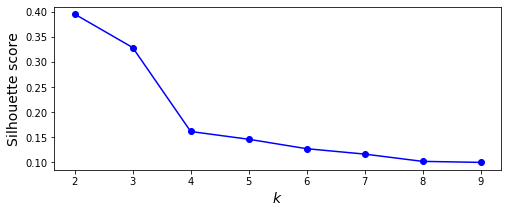

In [141]:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(wave_form)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(wave_form, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

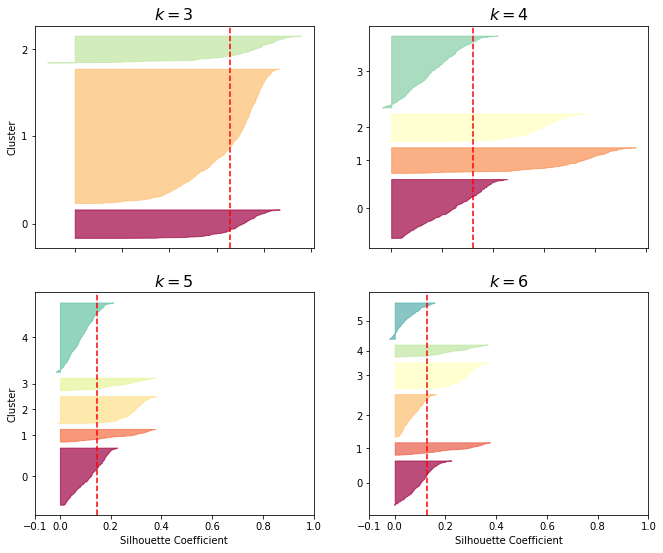

In [142]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(scaledWaves, y_pred)

    padding = len(wave_form) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

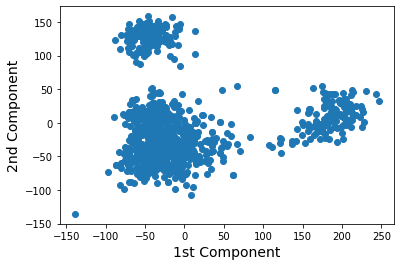

In [148]:
fig, ax = plt.subplots()
ax.scatter(wave_pcs[:,0],wave_pcs[:,1])
plt.xlabel("1st Component", fontsize=14)
plt.ylabel("2nd Component", fontsize=14)
plt.show()

In [149]:
#stick silhouette score looks like k=4, but k=3 looks better from PCA
best_model=kmeans_per_k[2]


First Neuron


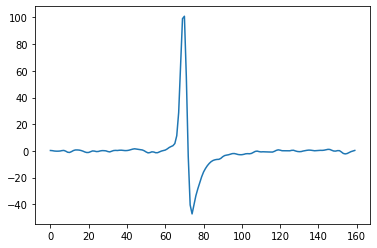

In [150]:
#plot each waveform
labels=best_model.labels_
print('First Neuron')
plt.plot(np.mean(scaledWaves[labels==0], axis=0))

Second Neuron


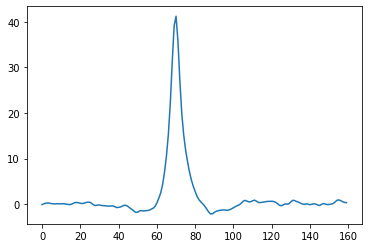

In [151]:
print('Second Neuron')
plt.plot(np.mean(scaledWaves[labels==1], axis=0))

Third Neuron


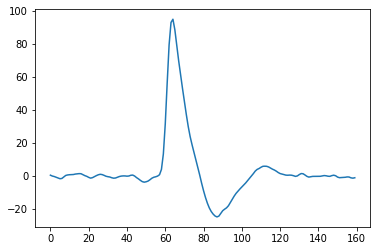

In [152]:
print('Third Neuron')
plt.plot(np.mean(scaledWaves[labels==2], axis=0))

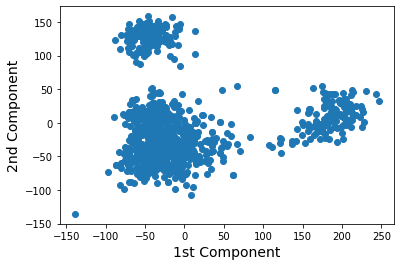

In [147]:

fig, ax = plt.subplots()
ax.scatter(wave_pcs[:,0],wave_pcs[:,1])
plt.xlabel("1st Component", fontsize=14)
plt.ylabel("2nd Component", fontsize=14)
plt.show()

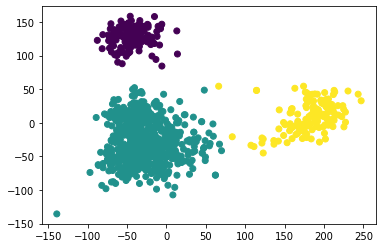

In [156]:
spikes = best_model.fit_predict(wave_pcs)
ax = plt.scatter(wave_pcs[:,0],wave_pcs[:,1], c=spikes)
plt.show()

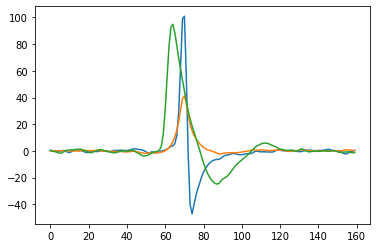

In [153]:
#overlay of mean waveforms
wave1=np.mean(scaledWaves[labels==0], axis=0)
wave2=np.mean(scaledWaves[labels==1], axis=0)
wave3=np.mean(scaledWaves[labels==2], axis=0)
fig, ax = plt.subplots()
for wave in [wave1,wave2,wave3]:
    ax.plot(wave)
plt.show()
    
